# Chapter 1

__Kinnick Fox__

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


## Exercise 1-1

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [ ]:
preg.birthord.value_counts()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [ ]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [ ]:
preg.prglngth.value_counts()

39    4744
40    1120
38     609
9      594
41     591
6      543
37     457
13     446
4      412
8      409
35     357
36     329
42     328
17     253
11     202
30     198
5      181
7      175
12     170
3      151
43     148
22     147
10     137
32     122
26     117
2       78
34      60
33      50
44      46
16      44
15      39
28      38
21      37
19      34
24      31
31      29
14      29
29      23
20      18
18      17
0       15
25      15
23      12
45      10
1        9
27       8
48       7
50       2
47       1
46       1
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [ ]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [ ]:
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [ ]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [ ]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents? __15 & 44__

In [ ]:
resp.age_r.value_counts().sort_index(ascending=False)

44    235
43    253
42    215
41    250
40    256
39    215
38    256
37    271
36    266
35    262
34    255
33    257
32    273
31    278
30    292
29    262
28    252
27    255
26    260
25    267
24    269
23    282
22    287
21    267
20    258
19    241
18    235
17    234
16    223
15    217
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [ ]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [ ]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with `caseid` 1? __44__

In [ ]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298? __40/36/30/40__

In [ ]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012? __6__

In [ ]:
preg[preg.caseid==5012].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64

##Exercise 1-2

In [ ]:
# Author: Kinnick Fox
# Date: 12/16/2022
# Ref:  Allen B. Downey

from __future__ import print_function, division
import nsfg
import thinkstats2

# read and store file as df
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    return df

def ValidatePregnum(resp):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    """
    # read the pregnancy frame
    preg = nsfg.ReadFemPreg()

    # make the map from caseid to list of pregnancy indices
    preg_map = nsfg.MakePregMap(preg)

    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def main():
    resp = ReadFemResp()
    assert (len(resp) == 7643)
    assert (resp.pregnum.value_counts()[1] == 1267)
    assert (ValidatePregnum(resp))  # calls MakePregMap function
    print('All tests passed.' )


if __name__ == '__main__':
    main()

# Chapter 2

## Exercise 2-1

Which summery statistics would you use to get a story on the evening news?

**Outliers and modes would most likely be the most eyecatching.**

Which for an anxious parent?

**Central tendency and possibly tails would be the most reassuring statistics.**

Do First Babies Arrive Late?

**No, first babies do not necessarily arrive late. Every pregnancy and birthing person’s body is different and there is not enough evidence to definitively say that first pregnancy babies will arrive later than future babies or later than full term. However, on average, first pregnancies have been known to last very, very slightly longer than the average subsequent birth. Again, this does not mean that the first pregnancy will come late but instead that there is a very slight statistical chance of the pregnancy being a longer than subsequent pregnancy.**

##Exercise 2-2

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [ ]:
firsts.totalwgt_lb.mean() < others.totalwgt_lb.mean()

True

In [ ]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

For the next few exercises, we'll load the respondent file:

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [ ]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

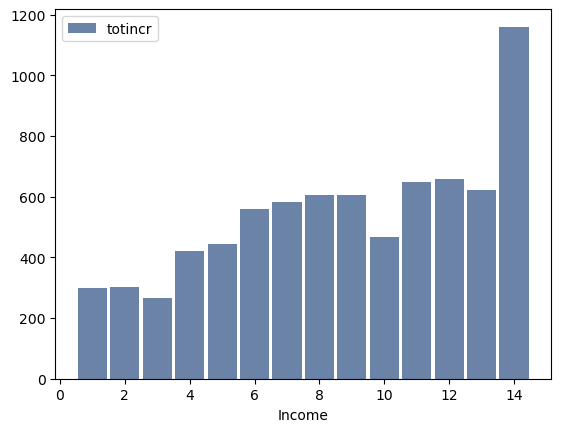

In [ ]:
inchist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(inchist, label = "totincr")
thinkplot.Config(xlabel = "Income", ylable = "Count")

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

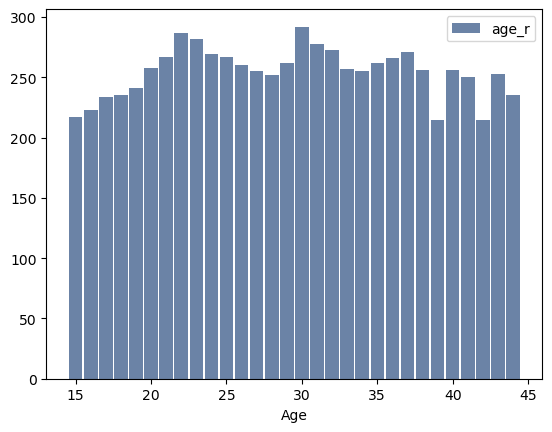

In [ ]:
agehist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(agehist, label = "age_r")
thinkplot.Config(xlabel = "Age", ylable = "Count")

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

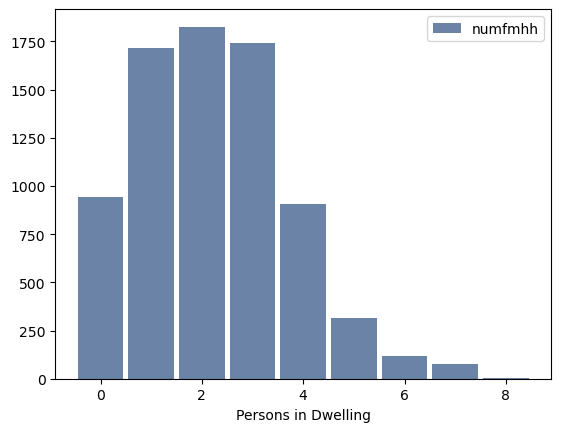

In [ ]:
pophist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(pophist, label = "numfmhh")
thinkplot.Config(xlabel = "Persons in Dwelling", ylable = "Count")

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

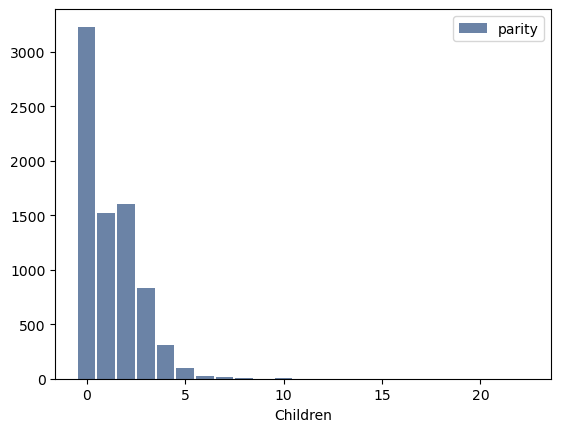

In [ ]:
chldhist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(chldhist, label = "parity")
thinkplot.Config(xlabel = "Children", ylable = "Count")
#It is skewed to the right

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [ ]:
chldhist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

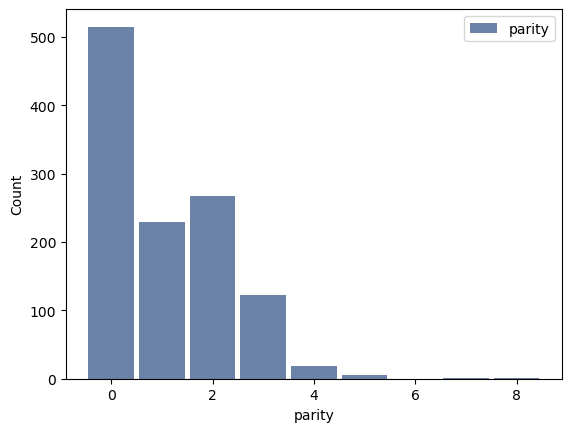

In [ ]:
prnt = resp[resp.totincr == 14]
chld = thinkstats2.Hist(prnt.parity)
thinkplot.Hist(chld, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Find the largest parities for high income respondents.

In [ ]:
chld.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [ ]:
pprnt = resp[resp.totincr <= 13]
prnt.parity.mean(), pprnt.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [ ]:
CohenEffectSize(prnt.parity, pprnt.parity) 
#It is 140% the size of the previous Cohen effect size.

-0.1251185531466061